In [2]:
pip install ultralytics opencv-python torch torchvision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall


0: 448x640 4 persons, 29 cars, 7 buss, 185.2ms
Speed: 3.5ms preprocess, 185.2ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


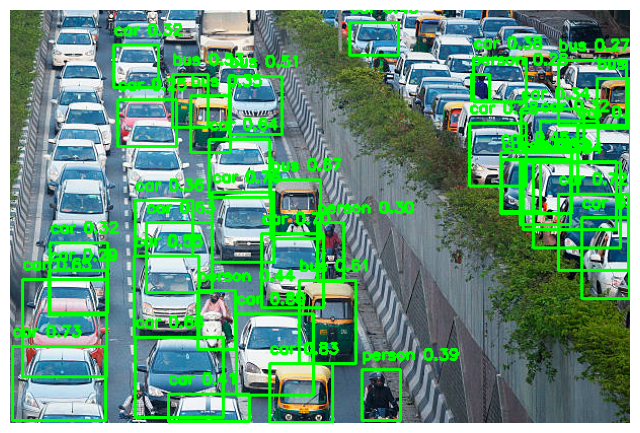

In [4]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load YOLO model
model = YOLO("yolov8n.pt")  # Replace with your trained model if needed

# Load and process image
img_path = "traffic.jpg"  # Make sure this image exists in Colab
img = cv2.imread(img_path)

# Run YOLO prediction
results = model.predict(img, save=False)

# Draw bounding boxes
for r in results:
    for box in r.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get coordinates
        label = model.names[int(box.cls[0])]  # Get class name
        confidence = box.conf[0]  # Get confidence score

        # Draw bounding box & label on image
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img, f"{label} {confidence:.2f}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Convert image to RGB (for displaying in Colab)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Show the image
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis("off")
plt.show()


In [5]:
# Print YOLO detection results
for r in results:
    for box in r.boxes:
        label = model.names[int(box.cls[0])]  # Class name
        confidence = box.conf[0].item()  # Confidence score
        print(f"Detected: {label} with {confidence:.2f} confidence")


Detected: car with 0.83 confidence
Detected: car with 0.80 confidence
Detected: car with 0.76 confidence
Detected: car with 0.73 confidence
Detected: car with 0.72 confidence
Detected: car with 0.70 confidence
Detected: car with 0.70 confidence
Detected: bus with 0.67 confidence
Detected: car with 0.66 confidence
Detected: car with 0.65 confidence
Detected: car with 0.64 confidence
Detected: car with 0.63 confidence
Detected: car with 0.62 confidence
Detected: bus with 0.61 confidence
Detected: car with 0.55 confidence
Detected: bus with 0.53 confidence
Detected: car with 0.52 confidence
Detected: bus with 0.51 confidence
Detected: car with 0.45 confidence
Detected: car with 0.45 confidence
Detected: person with 0.44 confidence
Detected: car with 0.41 confidence
Detected: person with 0.39 confidence
Detected: car with 0.39 confidence
Detected: car with 0.38 confidence
Detected: car with 0.36 confidence
Detected: bus with 0.35 confidence
Detected: bus with 0.35 confidence
Detected: car 

In [7]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.8 MB/s eta 0:00:00


In [8]:
import gradio as gr
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load YOLO model
model = YOLO("yolov8n.pt")  # Replace with your trained model if needed

def detect_vehicles_with_chart(image):
    # Convert Gradio image (numpy) to OpenCV format
    img = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Run YOLO detection
    results = model.predict(img, save=False)

    # Initialize vehicle count
    vehicle_counts = {"car": 0, "bus": 0, "truck": 0, "person": 0}

    # Draw bounding boxes
    for r in results:
        for box in r.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get coordinates
            label = model.names[int(box.cls[0])]  # Class name

            # Count only vehicles
            if label in vehicle_counts:
                vehicle_counts[label] += 1

            # Draw bounding box
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, label, (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Convert image back to RGB for Gradio
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Create Bar Chart
    plt.figure(figsize=(5, 3))
    plt.bar(vehicle_counts.keys(), vehicle_counts.values(), color=['blue', 'red', 'green', 'orange'])
    plt.xlabel("Vehicle Type")
    plt.ylabel("Count")
    plt.title("Detected Vehicle Types")

    chart_path = "chart.png"
    plt.savefig(chart_path)
    plt.close()

    return img, f"Detected Vehicles: {sum(vehicle_counts.values())}", chart_path


In [9]:
interface = gr.Interface(
    fn=detect_vehicles_with_chart,
    inputs=gr.Image(type="numpy"),
    outputs=[gr.Image(type="numpy"), "text", gr.Image(type="filepath")],
    title="🚦 AI-Powered Traffic Analysis",
    description="Upload a traffic image to detect vehicles and view insights."
)

interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://886d7abd14c7f2c0f7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
